# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [179]:
# Add your imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime, timedelta, date, time

In [180]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [181]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego/'

In [182]:
colors_df = pd.read_csv(LEGO_DATA_FOLDER+'/colors.csv.zip')
inventories_df = pd.read_csv(LEGO_DATA_FOLDER+'/inventories.csv.zip')
inventory_parts_df = pd.read_csv(LEGO_DATA_FOLDER+'/inventory_parts.csv.zip')
inventory_sets_df = pd.read_csv(LEGO_DATA_FOLDER+'/inventory_sets.csv.zip')
part_categories_df = pd.read_csv(LEGO_DATA_FOLDER+'/part_categories.csv.zip')
parts_df = pd.read_csv(LEGO_DATA_FOLDER+'/parts.csv.zip')
sets_df = pd.read_csv(LEGO_DATA_FOLDER+'/sets.csv.zip')
themes_df = pd.read_csv(LEGO_DATA_FOLDER+'/themes.csv.zip')

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

### Answer :
We encountered some inconsistencies in the dataset :
For the Sets :
- some values are not integers (e.g : 80s), we chose to replace them with the mean value , here 1985 for the 80s.
- Some values are negatives, e.g -1962, so we chose to take the absolute value because we considered them like consistent data.
- Finally, other values have 5 ciphers, it may be related to a parsing issue because they are many of them, and each time the last digit is repeated, so we chose to remove the last digit by dividing by 10 and keeping only the integer part of it.

After the cleaning process, we can see the time range of the sets by looking at the min value (1950) and the maximum value (2017) listed below.

For the inventory parts, some values are infinitely small values and are written as "-inf" in the dataset, since we can only have positive values for the quantities, we chose to replace them by 0.
We can see the average quantity of the inventory part below.

In [183]:
sets = sets_df.copy()
string_indexes = sets.year[sets.year.apply(lambda x: x.endswith('s'))]
sets.year = sets.year.replace({'70s': 1975, '80s': 1985, '90s': 1995})
years_int = pd.to_numeric(sets.year).abs().apply(lambda x : int(x/10) if x>datetime.now().year else x)
years_int.min(), years_int.max()

(1950, 2017)

In [184]:
inventory_parts = inventory_parts_df.copy()
inventory_parts.quantity = inventory_parts.quantity.replace({-np.inf: 0}) #-inf is an infinitely small values. Since we can have only positiv quantity, we set them to 0
inventory_parts.quantity.mean()

2.7670542575540584

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

## Answers

# A3.1

Not finished, we need to add/modify some things

In [185]:
car_list = ('car','engine','wheel', 'sportcar', 'automobile', 'vehicle', 'motor', 'turbo')
sets_df[sets_df.name.str.contains('|'.join(car_list))].id.values

array(['10022-1', '10025-1', '1214-1', '1236-1', '1249-1', '1382-1',
       '2585-1', '3552-1', '3571-1', '3714-1', '40243-1', '41124-1',
       '44003-1', '518-1', '519-1', '520-1', '520-2', '520-3', '520-4',
       '520-5', '520-6', '520-7', '520-8', '521-1', '60063-10', '603-1',
       '6868-1', '70910-1', '70913-1', '71002-2', '7305-1', '75012-1',
       '75171-1', '75523-1', '76042-1', '76054-1', '7786-1', '7904-13',
       '7904-15', '8070-1', '857-1', '8634-1', '8830-1', '8953-1',
       '970630-1', '9849-1', 'EMMETSCAR-1', 'FR561610-1', 'K1383-1'],
      dtype=object)

# A3.2

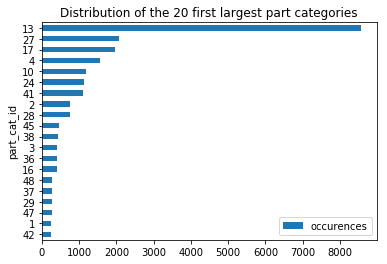

In [186]:
index_largest_cat = parts_df.groupby('part_cat_id')['id'].count().sort_values(ascending=False).head(20)
names = part_categories_df.loc[index_largest_cat.index]['name']
pd.DataFrame({'name': names, 'occurences': index_largest_cat.values}).sort_values(by='occurences', ascending=True).plot.barh(title = 'Distribution of the 20 first largest part categories')

# A3.3

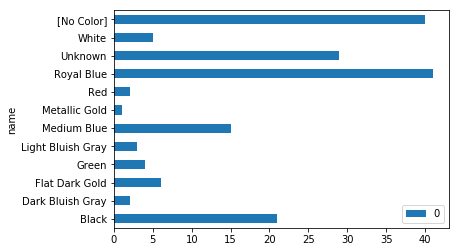

In [187]:

merged = pd.merge(inventory_parts.set_index('inventory_id'), inventory_sets_df.set_index('inventory_id'), left_index=True, right_index=True)
merged['quantity'] = merged.quantity_x*merged.quantity_y
merged = merged.reset_index()
merged.drop(['quantity_x', 'quantity_y', 'is_spare','part_id', 'inventory_id'], axis=1,  inplace=True)
merged = merged.reset_index().sort_values('quantity', ascending=False).drop_duplicates(['set_id'])
final = pd.merge(merged, colors_df, how='left', left_on=['color_id'], right_on=['id'])[['set_id', 'name', 'rgb']]
final = final.groupby(['name', 'rgb']).size().to_frame().reset_index()
final.plot(x='name', kind='barh')

In [188]:
grouped = inventory_sets_df.groupby(inventory_sets_df['set_id'])
#list(grouped)

# A3.4

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [189]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [190]:
bike = pd.read_json(BIKES_DATA_FOLDER + '/metro-bike-share-trip-data.json.zip',compression='zip')

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

## Answer

The majority of attributes are numerical except for four of them : two are dates, i.e, Start and End Time, and two are categoricals, i.e, the Category of Trip Route and Passholder Type. 

The latitude and longitude columns are useless since they depend solely on the ID of the bike station. At first sight, either the duration or the end time are redundant since we have the start time.

One issue that might appear is the lack of consistency as they can indicate different values, which is a problem since you cannot know which one is the right one.

As we prefer to have the least amount of datetime datatype we drop the End Time and not Duration.

The one with redundancy is more susceptible to inconsistencies.

In [191]:
bike.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


In [192]:
bike['Trip ID'].is_unique

True

In [193]:
bike

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.237210,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.237210,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.241560,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.255880,1940317,Round Trip
5,6717.0,780,2016-07-07T13:04:00,3054.0,34.039219,-118.236490,Monthly Pass,30.0,2016-07-07T12:51:00,3021.0,34.045609,-118.237030,1944075,One Way
6,5721.0,600,2016-07-07T13:04:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T12:54:00,3022.0,34.046070,-118.233090,1944073,One Way
7,5957.0,600,2016-07-07T13:09:00,3005.0,34.048550,-118.259050,Flex Pass,365.0,2016-07-07T12:59:00,3076.0,34.040600,-118.253840,1944067,One Way
8,6137.0,2880,2016-07-07T13:49:00,3031.0,34.044701,-118.252440,Flex Pass,365.0,2016-07-07T13:01:00,3031.0,34.044701,-118.252440,1944062,Round Trip
9,6351.0,960,2016-07-07T13:17:00,3078.0,34.064281,-118.238940,Monthly Pass,30.0,2016-07-07T13:01:00,3031.0,34.044701,-118.252440,1944063,One Way


In [194]:
print('There are '+str(bike.shape[0]-bike.dropna().shape[0])+' rows with missing values')

There are 1712 rows with missing values


In [195]:
bike = bike.dropna()

#Transforming the custom date type into datetime64
bike['End Time']   = pd.to_datetime(bike['End Time'])
bike['Start Time'] = pd.to_datetime(bike['Start Time'])

#One-hot encoding the categorical attributes or changing the categories to 0,1,2

#Extracting the redundant data
red_bike = bike[['End Time','Starting Station Latitude','Starting Station Longitude']].copy() 

#Dropping the redundant data from the main dataframe
bike = bike.drop(['End Time','Starting Station Latitude','Starting Station Longitude'], axis=1)

print('The types of the attributes of the non redundant dataframe are the following:\n' + str(bike.dtypes) +'\n\nThe types of the attributes of the extracted dataframe are the following:\n' + str(red_bike.dtypes))
print('\nThe shape of the non redundant dataframe: ' + str(bike.shape)+'\nThe shape of the extracted dataframe: '+str(red_bike.shape))

C:\Anaconda\envs\ada\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The types of the attributes of the non redundant dataframe are the following:
Bike ID                            float64
Duration                             int64
Ending Station ID                  float64
Ending Station Latitude            float64
Ending Station Longitude           float64
Passholder Type                     object
Plan Duration                      float64
Start Time                  datetime64[ns]
Starting Station ID                float64
Trip ID                              int64
Trip Route Category                 object
dtype: object

The types of the attributes of the extracted dataframe are the following:
End Time                      datetime64[ns]
Starting Station Latitude            float64
Starting Station Longitude           float64
dtype: object

The shape of the non redundant dataframe: (130715, 11)
The shape of the extracted dataframe: (130715, 3)


C:\Anaconda\envs\ada\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


__\* Briefly explain your approach here \*__

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

# B3.1

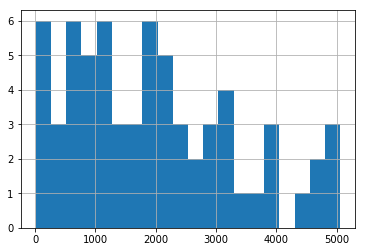

In [196]:
pd.crosstab(bike['Starting Station ID'],bike['Ending Station ID']).sum(axis=1).hist(bins=20)

# B3.2

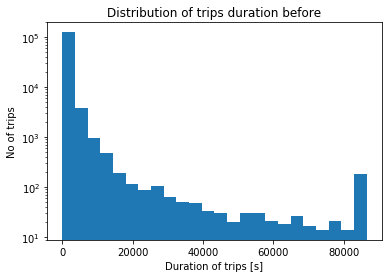

In [197]:
bike['Duration'].plot.hist(bins=range(np.min(bike['Duration']), np.max(bike['Duration']) + 3600, 3600),logy=True)
plt.ylabel('No of trips')
plt.xlabel('Duration of trips [s]')
plt.title('Distribution of trips duration before')
plt.show()

In [198]:
bike_intermediary = bike.copy()
bike_intermediary[['End Time','Starting Station Latitude','Starting Station Longitude']] = red_bike

number_outliers = ((bike_intermediary['End Time']-bike_intermediary['Start Time']).dt.days > 0).sum()
print('There are '+ str(number_outliers) +' incoherences between the time attributes.')

There are 162 incoherences between the time attributes.


As shown above, we find that there is a maximum value to the duration attribute, indeed for travels lasting more than 24 hours the duration value indicates 86400 seconds (24 hours). We choose to drop those rows in order to stay consistent with the dropping process. To do this we reuse the original `Dataframe` in order to discriminate the said rows.

In [199]:
bike_intermediary = bike.copy()
bike_intermediary[['End Time','Starting Station Latitude','Starting Station Longitude']] = red_bike

mask = (bike_intermediary['End Time']-bike_intermediary['Start Time']).dt.days == 0
bike_intermediary = bike_intermediary[mask]

bike = bike_intermediary.drop(['End Time','Starting Station Latitude','Starting Station Longitude'], axis=1)

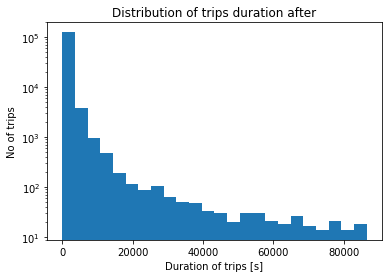

In [200]:
mask = (bike_intermediary['End Time']-bike_intermediary['Start Time']).dt.days == 0
bike_intermediary = bike_intermediary[mask]

bike = bike_intermediary.drop(['End Time','Starting Station Latitude','Starting Station Longitude'], axis=1)
bike['Duration'].plot.hist(bins=range(np.min(bike['Duration']), np.max(bike['Duration']) + 3600, 3600),logy=True)
plt.ylabel('No of trips')
plt.xlabel('Duration of trips [s]')
plt.title('Distribution of trips duration after')
plt.show()

Text(0.5,1,'Distribution of  trip starting hour')

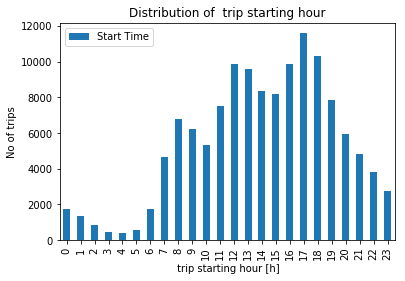

In [201]:
temp = bike[['Start Time']].copy()
temp.set_index('Start Time', drop=False, inplace=True)
temp.groupby(temp.index.hour).count().plot(kind='bar')
plt.ylabel('No of trips')
plt.xlabel(' trip starting hour [h]')
plt.title('Distribution of  trip starting hour')

We can see in the plot above that the distribution of trip starting hour reflects human behaviour.
Indeed, from 11 p.m t0 6 a.m, we assume that most of people are sleeping so the number of trip is quite low and decreasing.
People start going to work from 7 a.m so basically the trends suggests that the number of trip is increasing to reach its maxima at 5 p.m where we assume that people finish work and start going home, which explain the decrease on the curve.
We observe a local minima which is not null, we may assume that they represent the party-goers.

# B3.3

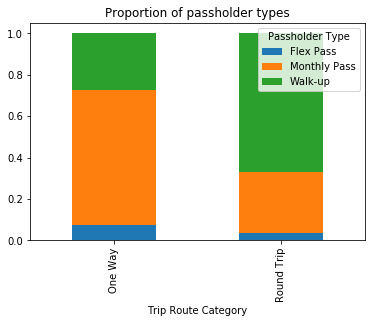

In [202]:
bars = pd.crosstab(bike['Trip Route Category'],bike['Passholder Type'],normalize='index')

bars.plot.bar(stacked=True)
plt.title('Proportion of passholder types')
plt.show()

# B3.4

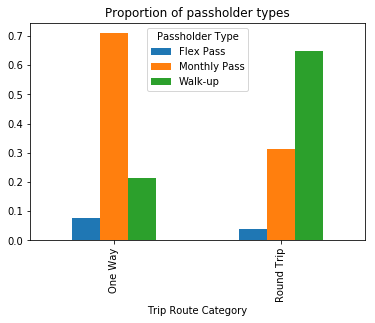

In [203]:
barc = pd.crosstab(bike[bike['Start Time'].dt.hour<12]['Trip Route Category'],bike[bike['Start Time'].dt.hour<12]['Passholder Type'],normalize='index')

barc.plot.bar()
plt.title('Proportion of passholder types')
plt.show()

# B3.5

In [204]:
min_proportion = 1.0
index = 0

for i in range (1,24) :
    proportion = (bike[bike['Start Time'].dt.hour<i].count()/bike['Start Time'].count())[0]
    if(np.abs(proportion-0.5) < np.abs(min_proportion-0.5)) :
        min_proportion = proportion
        index = i

print('The hour of the day separating the day into two part with close to the same number of bikes leaving the station is %d'%index)

The hour of the day separating the day into two part with close to the same number of bikes leaving the station is 15


In [205]:
bike_before = bike[bike['Start Time'].dt.hour<index]
bike_after  = bike[bike['Start Time'].dt.hour>=index]

prop_before = pd.crosstab(bike_before['Trip Route Category'],bike_before['Passholder Type'],normalize='all')
prop_before

Passholder Type,Flex Pass,Monthly Pass,Walk-up
Trip Route Category,,,
One Way,0.069992,0.595534,0.236022
Round Trip,0.004081,0.030769,0.063602


In [206]:
prop_after = pd.crosstab(bike_after['Trip Route Category'],bike_after['Passholder Type'],normalize='all')
prop_after

Passholder Type,Flex Pass,Monthly Pass,Walk-up
Trip Route Category,,,
One Way,0.067357,0.581029,0.257297
Round Trip,0.003286,0.025856,0.065176


In [207]:
max_variation = (prop_after-prop_before).max().max()
print("The proportion of trips does depend on whether it is the first or second hour interval but not in a significant manner (a \nmaximum of %.3f variation)."%max_variation)

The proportion of trips does depend on whether it is the first or second hour interval but not in a significant manner (a 
maximum of 0.021 variation).


In [208]:
nb_before = bike_before['Passholder Type'][bike_before['Passholder Type'] == 'Monthly Pass'].count()
nb_after  = bike_after['Passholder Type'][bike_after['Passholder Type'] == 'Monthly Pass'].count()

print('The difference in number of monthly pass users between the first and second interval is %d' %(nb_before-nb_after))
print('It means that there are more monthly pass users in the first interval than the second one, which would make the ')
print('scheme of making them pay less in the first and more in the second a loss of money for the business.')

The difference in number of monthly pass users between the first and second interval is 1447
It means that there are more monthly pass users in the first interval than the second one, which would make the 
scheme of making them pay less in the first and more in the second a loss of money for the business.
